In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader

import math
from collections import defaultdict, OrderedDict
import copy

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, mean_absolute_error, matthews_corrcoef

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tarfile
import os
import h5py

zip_file_path = 'C:\\Users\\rania\\Downloads\\ukdale.h5 (1).tgz'
extract_to_path = 'C:\\Users\\rania\\Downloads'

os.makedirs(extract_to_path, exist_ok=True)

# Extract the tar.gz file
with tarfile.open(zip_file_path, 'r:gz') as tar_ref:
    tar_ref.extractall(extract_to_path)

print(f'Extraction terminée! Les fichiers ont été extraits dans {extract_to_path}')

# Path to the extracted HDF5 file
h5_file_path = os.path.join(extract_to_path, 'ukdale.h5')

# Check if the HDF5 file exists
if os.path.exists(h5_file_path):
    # Open the HDF5 file and list its contents
    with h5py.File(h5_file_path, 'r') as h5_file:
        print("Contents of the HDF5 file:")
        def print_hdf5_item(name, obj):
            print(name)
        
        h5_file.visititems(print_hdf5_item)
else:
    print(f"The file {h5_file_path} does not exist.")



Extraction terminée! Les fichiers ont été extraits dans C:\Users\rania\Downloads
Contents of the HDF5 file:
building1
building1/elec
building1/elec/meter1
building1/elec/meter1/_i_table
building1/elec/meter1/_i_table/index
building1/elec/meter1/_i_table/index/abounds
building1/elec/meter1/_i_table/index/bounds
building1/elec/meter1/_i_table/index/indices
building1/elec/meter1/_i_table/index/indicesLR
building1/elec/meter1/_i_table/index/mbounds
building1/elec/meter1/_i_table/index/mranges
building1/elec/meter1/_i_table/index/ranges
building1/elec/meter1/_i_table/index/sorted
building1/elec/meter1/_i_table/index/sortedLR
building1/elec/meter1/_i_table/index/zbounds
building1/elec/meter1/table
building1/elec/meter10
building1/elec/meter10/_i_table
building1/elec/meter10/_i_table/index
building1/elec/meter10/_i_table/index/abounds
building1/elec/meter10/_i_table/index/bounds
building1/elec/meter10/_i_table/index/indices
building1/elec/meter10/_i_table/index/indicesLR
building1/elec/meter1

building1/elec/meter26/_i_table/index/sorted
building1/elec/meter26/_i_table/index/sortedLR
building1/elec/meter26/_i_table/index/zbounds
building1/elec/meter26/table
building1/elec/meter27
building1/elec/meter27/_i_table
building1/elec/meter27/_i_table/index
building1/elec/meter27/_i_table/index/abounds
building1/elec/meter27/_i_table/index/bounds
building1/elec/meter27/_i_table/index/indices
building1/elec/meter27/_i_table/index/indicesLR
building1/elec/meter27/_i_table/index/mbounds
building1/elec/meter27/_i_table/index/mranges
building1/elec/meter27/_i_table/index/ranges
building1/elec/meter27/_i_table/index/sorted
building1/elec/meter27/_i_table/index/sortedLR
building1/elec/meter27/_i_table/index/zbounds
building1/elec/meter27/table
building1/elec/meter28
building1/elec/meter28/_i_table
building1/elec/meter28/_i_table/index
building1/elec/meter28/_i_table/index/abounds
building1/elec/meter28/_i_table/index/bounds
building1/elec/meter28/_i_table/index/indices
building1/elec/meter2

building1/elec/meter42/_i_table/index/indices
building1/elec/meter42/_i_table/index/indicesLR
building1/elec/meter42/_i_table/index/mbounds
building1/elec/meter42/_i_table/index/mranges
building1/elec/meter42/_i_table/index/ranges
building1/elec/meter42/_i_table/index/sorted
building1/elec/meter42/_i_table/index/sortedLR
building1/elec/meter42/_i_table/index/zbounds
building1/elec/meter42/table
building1/elec/meter43
building1/elec/meter43/_i_table
building1/elec/meter43/_i_table/index
building1/elec/meter43/_i_table/index/abounds
building1/elec/meter43/_i_table/index/bounds
building1/elec/meter43/_i_table/index/indices
building1/elec/meter43/_i_table/index/indicesLR
building1/elec/meter43/_i_table/index/mbounds
building1/elec/meter43/_i_table/index/mranges
building1/elec/meter43/_i_table/index/ranges
building1/elec/meter43/_i_table/index/sorted
building1/elec/meter43/_i_table/index/sortedLR
building1/elec/meter43/_i_table/index/zbounds
building1/elec/meter43/table
building1/elec/meter

building1/elec/meter8/_i_table/index/sorted
building1/elec/meter8/_i_table/index/sortedLR
building1/elec/meter8/_i_table/index/zbounds
building1/elec/meter8/table
building1/elec/meter9
building1/elec/meter9/_i_table
building1/elec/meter9/_i_table/index
building1/elec/meter9/_i_table/index/abounds
building1/elec/meter9/_i_table/index/bounds
building1/elec/meter9/_i_table/index/indices
building1/elec/meter9/_i_table/index/indicesLR
building1/elec/meter9/_i_table/index/mbounds
building1/elec/meter9/_i_table/index/mranges
building1/elec/meter9/_i_table/index/ranges
building1/elec/meter9/_i_table/index/sorted
building1/elec/meter9/_i_table/index/sortedLR
building1/elec/meter9/_i_table/index/zbounds
building1/elec/meter9/table
building2
building2/elec
building2/elec/meter1
building2/elec/meter1/_i_table
building2/elec/meter1/_i_table/index
building2/elec/meter1/_i_table/index/abounds
building2/elec/meter1/_i_table/index/bounds
building2/elec/meter1/_i_table/index/indices
building2/elec/meter

building2/elec/meter5/_i_table/index/indices
building2/elec/meter5/_i_table/index/indicesLR
building2/elec/meter5/_i_table/index/mbounds
building2/elec/meter5/_i_table/index/mranges
building2/elec/meter5/_i_table/index/ranges
building2/elec/meter5/_i_table/index/sorted
building2/elec/meter5/_i_table/index/sortedLR
building2/elec/meter5/_i_table/index/zbounds
building2/elec/meter5/table
building2/elec/meter6
building2/elec/meter6/_i_table
building2/elec/meter6/_i_table/index
building2/elec/meter6/_i_table/index/abounds
building2/elec/meter6/_i_table/index/bounds
building2/elec/meter6/_i_table/index/indices
building2/elec/meter6/_i_table/index/indicesLR
building2/elec/meter6/_i_table/index/mbounds
building2/elec/meter6/_i_table/index/mranges
building2/elec/meter6/_i_table/index/ranges
building2/elec/meter6/_i_table/index/sorted
building2/elec/meter6/_i_table/index/sortedLR
building2/elec/meter6/_i_table/index/zbounds
building2/elec/meter6/table
building2/elec/meter7
building2/elec/meter7

building5/elec/meter12/_i_table/index/sortedLR
building5/elec/meter12/_i_table/index/zbounds
building5/elec/meter12/table
building5/elec/meter13
building5/elec/meter13/_i_table
building5/elec/meter13/_i_table/index
building5/elec/meter13/_i_table/index/abounds
building5/elec/meter13/_i_table/index/bounds
building5/elec/meter13/_i_table/index/indices
building5/elec/meter13/_i_table/index/indicesLR
building5/elec/meter13/_i_table/index/mbounds
building5/elec/meter13/_i_table/index/mranges
building5/elec/meter13/_i_table/index/ranges
building5/elec/meter13/_i_table/index/sorted
building5/elec/meter13/_i_table/index/sortedLR
building5/elec/meter13/_i_table/index/zbounds
building5/elec/meter13/table
building5/elec/meter14
building5/elec/meter14/_i_table
building5/elec/meter14/_i_table/index
building5/elec/meter14/_i_table/index/abounds
building5/elec/meter14/_i_table/index/bounds
building5/elec/meter14/_i_table/index/indices
building5/elec/meter14/_i_table/index/indicesLR
building5/elec/met

In [3]:
store = pd.HDFStore('ukdale.h5')

In [4]:
def resample_meter(store=None, building=1, meter=1, period='1min', cutoff=1000.):
    key = '/building{}/elec/meter{}'.format(building,meter)
    m = store[key]
    v = m.values.flatten()
    t = m.index
    s = pd.Series(v, index=t).clip(0.,cutoff)
    s[s<10.] = 0.
    return s.resample('1s').ffill(limit=300).fillna(0.).resample(period).mean().tz_convert('UTC')

In [5]:
import requests

# The correct URL to the file you want to download
url = 'https://data.ukedc.rl.ac.uk/browse/edc/efficiency/residential/EnergyConsumption/Domestic/UK-DALE-2015/UK-DALE-disaggregated/house_1'

# The path where you want to save the file
local_filename = 'house_1'

# Send the HTTP GET request
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

print(f'File downloaded and saved as {local_filename}')

File downloaded and saved as house_1


In [6]:
import pandas as pd

def get_series(datastore, house, label, cutoff):
    # Use the correct file path
    filename = f"C:\\Users\\rania\\Downloads\\TPNILM-master\\house_1_labels.dat"
    print(filename)
    labels = pd.read_csv(filename, delimiter=' ', header=None, index_col=0).to_dict()[1]

    s = None
    for i in labels:
        if labels[i] == label:
            print(i, labels[i])
            s = resample_meter(store, house, i, '1min', cutoff)
            #s = resample_meter(store, house, i, '6s', cutoff)
    
    if s is not None:
        s.index.name = 'datetime'
    
    return s

In [7]:
house = 1
m = get_series(store, house, 'aggregate', 10000.)
if m is not None:
    m.name = 'aggregate'
    a1 = get_series(store, house, 'kettle', 3100.)
    a1.name = 'kettle'
    a2 = get_series(store, house, 'fridge', 300.)
    a2.name = 'fridge'
    a3 = get_series(store, house, 'washing_machine', 2500.)
    a3.name = 'washing_machine'
    a4 = get_series(store, house, 'microwave', 3000.)
    a4.name = 'microwave'
    a5 = get_series(store, house, 'dishwasher', 2500.)
    a5.name = 'dish_washer'
    ds_1 = pd.concat([m, a1, a2, a3, a4, a5], axis=1)
    ds_1.fillna(method='pad', inplace=True)

    ds_1_train = ds_1[pd.Timestamp(2013,4,12):pd.Timestamp(2014,12,15)]
    ds_1_valid = ds_1[pd.Timestamp(2014,12,15):]

C:\Users\rania\Downloads\TPNILM-master\house_1_labels.dat
1 aggregate
C:\Users\rania\Downloads\TPNILM-master\house_1_labels.dat
10 kettle
C:\Users\rania\Downloads\TPNILM-master\house_1_labels.dat
12 fridge
C:\Users\rania\Downloads\TPNILM-master\house_1_labels.dat
5 washing_machine
C:\Users\rania\Downloads\TPNILM-master\house_1_labels.dat
13 microwave
C:\Users\rania\Downloads\TPNILM-master\house_1_labels.dat
6 dishwasher


In [8]:
import pandas as pd

def get_series(datastore, house, label, cutoff):
    # Use the correct file path
    filename = f"C:\\Users\\rania\\Downloads\\TPNILM-master\\house_2_labels.dat"
    print(filename)
    labels = pd.read_csv(filename, delimiter=' ', header=None, index_col=0).to_dict()[1]

    s = None
    for i in labels:
        if labels[i] == label:
            print(i, labels[i])
            s = resample_meter(store, house, i, '1min', cutoff)
            #s = resample_meter(store, house, i, '6s', cutoff)
    
    if s is not None:
        s.index.name = 'datetime'
    
    return s

In [9]:
house = 2
m = get_series(store, house, 'aggregate', 10000.)
m.name = 'aggregate'
a1 = get_series(store, house, 'kettle', 3100.)
a1.name = 'kettle'
a2 = get_series(store, house, 'fridge', 300.)
a2.name = 'fridge'
a3 = get_series(store, house, 'washing_machine', 2500.)
a3.name = 'washing_machine'
a4 = get_series(store, house, 'microwave', 3000.)
a4.name = 'microwave'
a5 = get_series(store, house, 'dish_washer', 2500.)
a5.name = 'dish_washer'
ds_2 = pd.concat([m, a1, a2, a3, a4, a5], axis=1)
ds_2.fillna(method='pad', inplace=True)

ds_2_train = ds_2[pd.datetime(2013,5,22):pd.datetime(2013,10,3,6,16)]
ds_2_valid = ds_2[pd.datetime(2013,10,3,6,16):]


C:\Users\rania\Downloads\TPNILM-master\house_2_labels.dat
1 aggregate
C:\Users\rania\Downloads\TPNILM-master\house_2_labels.dat
8 kettle
C:\Users\rania\Downloads\TPNILM-master\house_2_labels.dat
14 fridge
C:\Users\rania\Downloads\TPNILM-master\house_2_labels.dat
12 washing_machine
C:\Users\rania\Downloads\TPNILM-master\house_2_labels.dat
15 microwave
C:\Users\rania\Downloads\TPNILM-master\house_2_labels.dat
13 dish_washer


In [10]:
import pandas as pd

def get_series(datastore, house, label, cutoff):
    # Use the correct file path
    filename = f"C:\\Users\\rania\\Downloads\\TPNILM-master\\house_3_labels.dat"
    print(filename)
    labels = pd.read_csv(filename, delimiter=' ', header=None, index_col=0).to_dict()[1]

    s = None
    for i in labels:
        if labels[i] == label:
            print(i, labels[i])
            s = resample_meter(store, house, i, '1min', cutoff)
            #s = resample_meter(store, house, i, '6s', cutoff)
    
    if s is not None:
        s.index.name = 'datetime'
    
    return s

In [11]:
house = 3
m = get_series(store, house, 'aggregate', 10000.)
m.name = 'aggregate'
a1 = get_series(store, house, 'kettle', 3100.)
a1.name = 'kettle'
a2 = 0.*m
a2.name = 'fridge'
a3 = 0.*m
a3.name = 'washing_machine'
a4 = 0.*m
a4.name = 'microwave'
a5 = 0.*m
a5.name = 'dish_washer'
ds_3 = pd.concat([m, a1, a2, a3, a4, a5], axis=1)
ds_3.fillna(method='pad', inplace=True)

ds_3_train = ds_3[pd.datetime(2013,2,27):pd.datetime(2013,4,1,6,15)]
ds_3_valid = ds_3[pd.datetime(2013,4,1,6,15):]

C:\Users\rania\Downloads\TPNILM-master\house_3_labels.dat
1 aggregate
C:\Users\rania\Downloads\TPNILM-master\house_3_labels.dat
2 kettle


In [12]:
import pandas as pd

def get_series(datastore, house, label, cutoff):
    # Use the correct file path
    filename = f"C:\\Users\\rania\\Downloads\\TPNILM-master\\house_4_labels.dat"
    print(filename)
    labels = pd.read_csv(filename, delimiter=' ', header=None, index_col=0).to_dict()[1]

    s = None
    for i in labels:
        if labels[i] == label:
            print(i, labels[i])
            s = resample_meter(store, house, i, '1min', cutoff)
            #s = resample_meter(store, house, i, '6s', cutoff)
    
    if s is not None:
        s.index.name = 'datetime'
    
    return s

In [13]:
house = 4
m = get_series(store, house, 'aggregate', 10000.)
m.name = 'aggregate'
a1 = get_series(store, house, 'kettle_radio', 3100.)
a1.name = 'kettle'
a2 = get_series(store, house, 'freezer', 300.)
a2.name = 'fridge'
a3 = 0.*m
a3.name = 'washing_machine'
a4 = 0.*m
a4.name = 'microwave'
a5 = 0.*m
a5.name = 'dish_washer'
ds_4 = pd.concat([m, a1, a2, a3, a4, a5], axis=1)
ds_4.fillna(method='pad', inplace=True)

ds_4_train = ds_4[pd.datetime(2013,3,9):pd.datetime(2013,9,24,6,15)]
ds_4_valid = ds_4[pd.datetime(2013,9,24,6,15):]

C:\Users\rania\Downloads\TPNILM-master\house_4_labels.dat
1 aggregate
C:\Users\rania\Downloads\TPNILM-master\house_4_labels.dat
3 kettle_radio
C:\Users\rania\Downloads\TPNILM-master\house_4_labels.dat
5 freezer


In [14]:
import pandas as pd

def get_series(datastore, house, label, cutoff):
    # Use the correct file path
    filename = f"C:\\Users\\rania\\Downloads\\TPNILM-master\\house_5_labels.dat"
    print(filename)
    labels = pd.read_csv(filename, delimiter=' ', header=None, index_col=0).to_dict()[1]

    s = None
    for i in labels:
        if labels[i] == label:
            print(i, labels[i])
            s = resample_meter(store, house, i, '1min', cutoff)
            #s = resample_meter(store, house, i, '6s', cutoff)
    
    if s is not None:
        s.index.name = 'datetime'
    
    return s

In [15]:
house = 5
m = get_series(store, house, 'aggregate', 10000.)
m.name = 'aggregate'
a1 = get_series(store, house, 'kettle', 3100.)
a1.name = 'kettle'
a2 = get_series(store, house, 'fridge_freezer', 300.)
a2.name = 'fridge'
a3 = get_series(store, house, 'washer_dryer', 2500.)
a3.name = 'washing_machine'
a4 = get_series(store, house, 'microwave', 3000.)
a4.name = 'microwave'
a5 = get_series(store, house, 'dishwasher', 2500.)
a5.name = 'dish_washer'
ds_5 = pd.concat([m, a1, a2, a3, a4, a5], axis=1)
ds_5.fillna(method='pad', inplace=True)

ds_5_train = ds_5[pd.datetime(2014,6,29):pd.datetime(2014,9,1)]
ds_5_valid = ds_5[pd.datetime(2014,9,1):]

C:\Users\rania\Downloads\TPNILM-master\house_5_labels.dat
1 aggregate
C:\Users\rania\Downloads\TPNILM-master\house_5_labels.dat
18 kettle
C:\Users\rania\Downloads\TPNILM-master\house_5_labels.dat
19 fridge_freezer
C:\Users\rania\Downloads\TPNILM-master\house_5_labels.dat
24 washer_dryer
C:\Users\rania\Downloads\TPNILM-master\house_5_labels.dat
23 microwave
C:\Users\rania\Downloads\TPNILM-master\house_5_labels.dat
22 dishwasher


In [16]:
ds_1_train.reset_index().to_hdf('./UKDALE_1_train.h5', key='df', mode='w')
ds_2_train.reset_index().to_hdf('./UKDALE_2_train.h5', key='df', mode='w')
ds_3_train.reset_index().to_hdf('./UKDALE_3_train.h5', key='df', mode='w')
ds_4_train.reset_index().to_hdf('./UKDALE_4_train.h5', key='df', mode='w')
ds_5_train.reset_index().to_hdf('./UKDALE_5_train.h5', key='df', mode='w')

ds_1_valid.reset_index().to_hdf('./UKDALE_1_valid.h5', key='df', mode='w')
ds_2_valid.reset_index().to_hdf('./UKDALE_2_valid.h5', key='df', mode='w')
ds_3_valid.reset_index().to_hdf('./UKDALE_3_valid.h5', key='df', mode='w')
ds_4_valid.reset_index().to_hdf('./UKDALE_4_valid.h5', key='df', mode='w')
ds_5_valid.reset_index().to_hdf('./UKDALE_5_valid.h5', key='df', mode='w')

In [17]:
def get_status(app, threshold, min_off, min_on):
    condition = app > threshold
    # Find the indicies of changes in "condition"
    d = np.diff(condition)
    idx, = d.nonzero()

    # We need to start things after the change in "condition". Therefore,
    # we'll shift the index by 1 to the right.
    idx += 1

    if condition[0]:
        # If the start of condition is True prepend a 0
        idx = np.r_[0, idx]

    if condition[-1]:
        # If the end of condition is True, append the length of the array
        idx = np.r_[idx, condition.size] # Edit

    # Reshape the result into two columns
    idx.shape = (-1,2)
    on_events = idx[:,0].copy()
    off_events = idx[:,1].copy()
    assert len(on_events) == len(off_events)

    if len(on_events) > 0:
        off_duration = on_events[1:] - off_events[:-1]
        off_duration = np.insert(off_duration, 0, 1000.)
        on_events = on_events[off_duration > min_off]
        off_events = off_events[np.roll(off_duration, -1) > min_off]
        assert len(on_events) == len(off_events)

        on_duration = off_events - on_events
        on_events = on_events[on_duration > min_on]
        off_events = off_events[on_duration > min_on]

    s = app.copy()
    #s.iloc[:] = 0.
    s[:] = 0.

    for on, off in zip(on_events, off_events):
        #s.iloc[on:off] = 1.
        s[on:off] = 1.

    return s

In [18]:
class Power(data.Dataset):
    def __init__(self, meter=None, appliance=None, status=None,
                 length=256, border=680, max_power=1., train=False):
        self.length = length
        self.border = border
        self.max_power = max_power
        self.train = train

        self.meter = meter.copy()/self.max_power
        self.appliance = appliance.copy()/self.max_power
        self.status = status.copy()

        self.epochs = (len(self.meter) - 2*self.border) // self.length

    def __getitem__(self, index):
        i = index * self.length + self.border
        if self.train:
            i = np.random.randint(self.border, len(self.meter) - self.length - self.border)

        x = self.meter.iloc[i-self.border:i+self.length+self.border].values.astype('float32')
        y = self.appliance.iloc[i:i+self.length].values.astype('float32')
        s = self.status.iloc[i:i+self.length].values.astype('float32')
        x -= x.mean()

        return x, y, s

    def __len__(self):
        return self.epochs

In [19]:
class Encoder(nn.Module):
    def __init__(self, in_features=3, out_features=1, kernel_size=3, padding=1, stride=1):
        super(Encoder, self).__init__()
        self.conv = nn.Conv1d(in_features, out_features, kernel_size=kernel_size, padding=padding, stride=stride, bias=False)
        self.bn = nn.BatchNorm1d(out_features)
        self.drop = nn.Dropout(0.1)

    def forward(self, x):
        # return self.bn(F.relu(self.conv(x)))
        return self.drop(self.bn(F.relu(self.conv(x))))

class TemporalPooling(nn.Module):
    def __init__(self, in_features=3, out_features=1, kernel_size=2):
        super(TemporalPooling, self).__init__()
        self.kernel_size = kernel_size
        self.pool = nn.AvgPool1d(kernel_size=self.kernel_size, stride=self.kernel_size)
        self.conv = nn.Conv1d(in_features, out_features, kernel_size=1, padding=0)
        # self.upsample = nn.Upsample( scale_factor=kernel_size, mode='linear', align_corners=True)
        self.bn = nn.BatchNorm1d(out_features)
        self.drop = nn.Dropout(0.1)

    def forward(self, x):
        x = self.pool(x)
        x = self.conv(x)
        x = self.bn(F.relu(x))
        # return self.upsample(x)
        # return self.drop(self.upsample(x))
        return self.drop(F.interpolate(x, scale_factor=self.kernel_size, mode='linear', align_corners=True))

class Decoder(nn.Module):
    def __init__(self, in_features=3, out_features=1, kernel_size=2, stride=2):
        super(Decoder, self).__init__()
        self.conv = nn.ConvTranspose1d(in_features, out_features, kernel_size=kernel_size, stride=stride, bias=False)
        self.bn = nn.BatchNorm1d(out_features)

    def forward(self, x):
        return F.relu(self.conv(x))

class PTPNet(nn.Module):

    def __init__(self, in_channels=3, out_channels=1, init_features=32):
        super(PTPNet, self).__init__()
        p = 2
        k = 1
        features = init_features
        self.encoder1 = Encoder(in_channels, features, kernel_size=3, padding=0)
        self.pool1 = nn.MaxPool1d(kernel_size=p, stride=p)
        self.encoder2 = Encoder(features * 1**k, features * 2**k, kernel_size=3, padding=0)
        self.pool2 = nn.MaxPool1d(kernel_size=p, stride=p)
        self.encoder3 = Encoder(features * 2**k, features * 4**k, kernel_size=3, padding=0)
        self.pool3 = nn.MaxPool1d(kernel_size=p, stride=p)
        self.encoder4 = Encoder(features * 4**k, features * 8**k, kernel_size=3, padding=0)

        self.tpool1 = TemporalPooling(features*8**k, features*2**k, kernel_size=5)
        self.tpool2 = TemporalPooling(features*8**k, features*2**k, kernel_size=10)
        self.tpool3 = TemporalPooling(features*8**k, features*2**k, kernel_size=20)
        self.tpool4 = TemporalPooling(features*8**k, features*2**k, kernel_size=30)

        self.decoder = Decoder(2*features * 8**k, features * 1**k, kernel_size=p**3, stride=p**3)

        self.activation = nn.Conv1d(features * 1**k, out_channels, kernel_size=1, padding=0)


    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))

        tp1 = self.tpool1(enc4)
        tp2 = self.tpool2(enc4)
        tp3 = self.tpool3(enc4)
        tp4 = self.tpool4(enc4)

        dec = self.decoder(torch.cat([enc4, tp1, tp2, tp3, tp4], dim=1))

        act = self.activation(dec)
        return act

x = torch.randn(32,1,60*8+2*16)
model = PTPNet(1,3,32)
print(model(x).shape)
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

torch.Size([32, 3, 480])
327619


In [20]:
def train_model(model, batch_size, n_epochs, filename):

    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the test loss as the model trains
    test_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = []
    # to track the average test loss per epoch as the model trains
    avg_test_losses = []

    min_loss = np.inf

    # initialize the early_stopping object
    # patience = 10
    # early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(1, n_epochs + 1):

        model.train() # prep model for training
        for batch, (data, target_power, target_status) in enumerate(train_loader, 1):
            data = data.unsqueeze(1)
            target_power = target_power
            target_status = target_status

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output_status = model(data).permute(0,2,1)
            # calculate the loss
            loss = criterion(output_status, target_status)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        model.eval() # prep model for evaluation
        for data, target_power, target_status in valid_loader:
            data = data.unsqueeze(1)
            target_power = target_power
            target_status = target_status

            # forward pass: compute predicted outputs by passing inputs to the model
            output_status = model(data).permute(0,2,1)
            # calculate the loss
            loss = criterion(output_status, target_status)
            # record validation loss
            valid_losses.append(loss.item())

        model.eval() # prep model for evaluation
        for data, target_power, target_status in test_loader:
            data = data.unsqueeze(1)
            target_power = target_power
            target_status = target_status

            # forward pass: compute predicted outputs by passing inputs to the model
            output_status = model(data).permute(0,2,1)
            # calculate the loss
            loss = criterion(output_status, target_status)
            # record validation loss
            test_losses.append(loss.item())

        # print training/validation statistics
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        test_loss = np.average(test_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        avg_test_losses.append(test_loss)

        epoch_len = len(str(n_epochs))

        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f} ' +
                     f'test_loss: {test_loss:.5f} ')

        print(print_msg)

        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        test_losses = []

        # early_stopping needs the validation loss to check if it has decresed,
        # and if it has, it will make a checkpoint of the current model
        # early_stopping(valid_loss, model)
        # if (early_stopping.early_stop and (epoch > 80)):
        #   break

        if valid_loss < min_loss:
            print(f'Validation loss decreased ({min_loss:.6f} --> {valid_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), filename)
            min_loss = valid_loss

    # load the last checkpoint with the best model
    model.load_state_dict(torch.load(filename))

    return  model, avg_train_losses, avg_valid_losses, avg_test_losses

In [21]:
def evaluate_activation(model, loader, a):
    x_true = []
    s_true = []
    p_true = []
    s_hat = []

    model.eval()
    with torch.no_grad():
        for x, p, s in loader:
            x = x.unsqueeze(1)
            p = p.permute(0,2,1)[:,a,:]
            s = s.permute(0,2,1)[:,a,:]

            sh = model(x)
            sh = torch.sigmoid(sh[:,a,:])

            s_hat.append(sh.contiguous().view(-1).detach().cpu().numpy())

            x_true.append(x[:,:,BORDER:-BORDER].contiguous().view(-1).detach().cpu().numpy())
            s_true.append(s.contiguous().view(-1).detach().cpu().numpy())
            p_true.append(p.contiguous().view(-1).detach().cpu().numpy())
    x_true = np.hstack(x_true)
    s_true = np.hstack(s_true)
    p_true = np.hstack(p_true)
    s_hat = np.hstack(s_hat)

    return x_true, p_true, s_true, s_hat

In [22]:
APPLIANCE = ['fridge', 'dish_washer', 'washing_machine']
THRESHOLD = [50., 10., 20.]
MIN_ON = [1., 30., 30.]
MIN_OFF = [1., 30., 3.]

METER = 'aggregate'
SEQ_LEN = 60*8
BORDER = 16
BATCH_SIZE = 32

MAX_POWER = 2000.

In [23]:
ds_meter = []
ds_appliance = []
ds_status = []
for i in range(5):
    ds = pd.read_hdf(f'./UKDALE_{i+1}_train.h5', key='df')
    ds.set_index('datetime', inplace=True)

    meter = ds[METER]
    appliances = ds[APPLIANCE]

    status = pd.DataFrame()
    for a in range(len(APPLIANCE)):
        status = pd.concat([status, get_status(ds[APPLIANCE[a]], THRESHOLD[a], MIN_OFF[a], MIN_ON[a])], axis=1)

    ds_meter.append(meter)
    ds_appliance.append(appliances)
    ds_status.append(status)

ds_len = [len(ds_meter[i]) for i in range(5)]

In [24]:
(ds_status[1].diff()==1).sum()

fridge             3525
dish_washer          98
washing_machine      54
dtype: int64

In [25]:
ds_status[1].describe()

,fridge,dish_washer,washing_machine
count,193337.000000,193337.000000,193337.000000
mean,0.377920,0.028918,0.011317
std,0.484869,0.167578,0.105778
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [28]:
ds_house_train = [Power(ds_meter[i][:int(0.8*ds_len[i])],
                        ds_appliance[i][:int(0.8*ds_len[i])],
                        ds_status[i][:int(0.8*ds_len[i])],
                        SEQ_LEN, BORDER, MAX_POWER, True) for i in range(5+0)]

ds_house_valid = [Power(ds_meter[i][int(0.8*ds_len[i]):int(0.9*ds_len[i])],
                        ds_appliance[i][int(0.8*ds_len[i]):int(0.9*ds_len[i])],
                        ds_status[i][int(0.8*ds_len[i]):int(0.9*ds_len[i])],
                        SEQ_LEN, BORDER, MAX_POWER, False) for i in range(5+0)]

ds_house_test  = [Power(ds_meter[i][int(0.9*ds_len[i]):],
                        ds_appliance[i][int(0.9*ds_len[i]):],
                        ds_status[i][int(0.9*ds_len[i]):],
                        SEQ_LEN, BORDER, MAX_POWER, False) for i in range(5+0)]

ds_house_total  = [Power(ds_meter[i], ds_appliance[i], ds_status[i],
                         SEQ_LEN, BORDER, MAX_POWER, False) for i in range(5+0)]

ds_train_seen = torch.utils.data.ConcatDataset([ds_house_train[0],
                                                ds_house_train[1],
                                                #ds_house_train[2],
                                                #ds_house_train[3],
                                                ds_house_train[4]
                                                ])
ds_valid_seen = torch.utils.data.ConcatDataset([ds_house_valid[0],
                                                #ds_house_valid[1],
                                                #ds_house_valid[2],
                                                #ds_house_valid[3],
                                                #ds_house_valid[4]
                                                ])

dl_train_seen = DataLoader(dataset = ds_train_seen, batch_size = BATCH_SIZE, shuffle=True)
dl_valid_seen = DataLoader(dataset = ds_valid_seen, batch_size = BATCH_SIZE, shuffle=False)
dl_test_seen = DataLoader(dataset = ds_house_test[0], batch_size = BATCH_SIZE, shuffle=False)

ds_train_unseen = torch.utils.data.ConcatDataset([ds_house_train[0],
                                                  #ds_house_train[1],
                                                  #ds_house_train[2],
                                                  #ds_house_train[3],
                                                  ds_house_train[4]
                                                  ])
ds_valid_unseen = torch.utils.data.ConcatDataset([ds_house_valid[0],
                                                  #ds_house_valid[1],
                                                  #ds_house_valid[2],
                                                  #ds_house_valid[3],
                                                  ds_house_valid[4]
                                                  ])
dl_train_unseen = DataLoader(dataset = ds_train_unseen, batch_size = BATCH_SIZE, shuffle=True)
dl_valid_unseen = DataLoader(dataset = ds_valid_unseen, batch_size = BATCH_SIZE, shuffle=False)
dl_test_unseen = DataLoader(dataset = ds_house_total[1], batch_size = BATCH_SIZE, shuffle=False)

dl_house_test = [DataLoader(dataset = ds_house_test[i], batch_size = 1, shuffle=False) for i in range(5)]
dl_house_valid = [DataLoader(dataset = ds_house_valid[i], batch_size = 1, shuffle=False) for i in range(5)]
dl_house_total = [DataLoader(dataset = ds_house_total[i], batch_size = 1, shuffle=False) for i in range(5)]

In [30]:
dataiter = iter(dl_house_test[1])

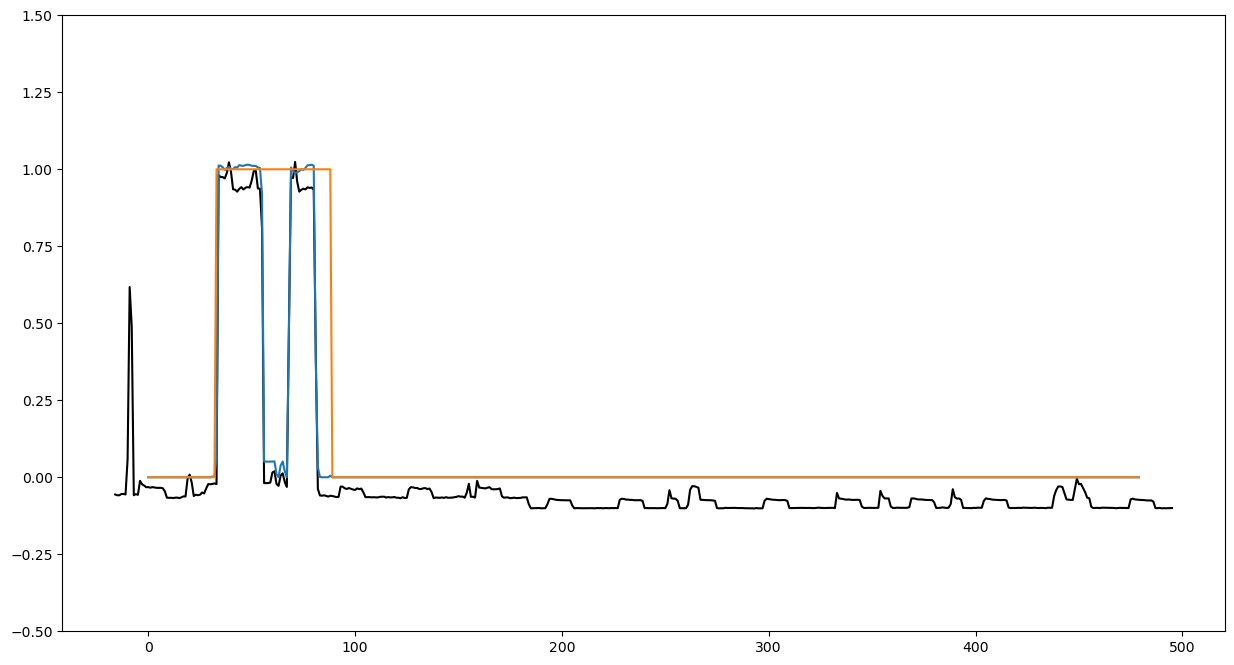

In [31]:
plt.figure(figsize=(15,8))
x, y, s = next(dataiter)  # Retrieving the first values
a = 1
for i in range(100):
    try:
        x, y, s = next(dataiter)
        if y[0,:,a].sum() > 0:
            break
        if s[0,:,a].sum() > 0:
            break
    except StopIteration:
        break

plt.plot(np.arange(-BORDER, SEQ_LEN + BORDER), x[0,:].detach().numpy(), 'k-')  # Assuming BORDER and SEQ_LEN are defined
plt.plot(y[0,:,a].detach().numpy())
plt.plot(s[0,:,a].detach().numpy())
plt.ylim([-0.5, 1.5])
plt.show()


In [ ]:
batch_size = BATCH_SIZE
n_epochs = 300

train_loader = dl_train_seen
valid_loader = dl_valid_seen
test_loader = dl_test_seen

#i = 0
for i in range(20):
    print('TRAINING MODEL %d' %i)
    # Instantiate the model
    model = PTPNet(1,3,32)
    optimizer = optim.Adam(model.parameters(), lr=1.E-4)
    criterion = nn.BCEWithLogitsLoss()
    fn = 'UKDALE_seen_%d.pth' %i
    model, train_loss, valid_loss, test_loss = train_model(model, batch_size, n_epochs, fn)

TRAINING MODEL 0
[  1/300] train_loss: 0.54706 valid_loss: 0.42006 test_loss: 0.42166 
Validation loss decreased (inf --> 0.420063).  Saving model ...
[  2/300] train_loss: 0.35472 valid_loss: 0.32319 test_loss: 0.33307 
Validation loss decreased (0.420063 --> 0.323190).  Saving model ...
[  3/300] train_loss: 0.27969 valid_loss: 0.27232 test_loss: 0.28999 
Validation loss decreased (0.323190 --> 0.272316).  Saving model ...
[  4/300] train_loss: 0.24160 valid_loss: 0.23711 test_loss: 0.25690 
Validation loss decreased (0.272316 --> 0.237113).  Saving model ...
[  5/300] train_loss: 0.21233 valid_loss: 0.21074 test_loss: 0.22886 
Validation loss decreased (0.237113 --> 0.210739).  Saving model ...
[  6/300] train_loss: 0.19085 valid_loss: 0.19370 test_loss: 0.20878 
Validation loss decreased (0.210739 --> 0.193703).  Saving model ...
[  7/300] train_loss: 0.17799 valid_loss: 0.18043 test_loss: 0.19408 
Validation loss decreased (0.193703 --> 0.180427).  Saving model ...
[  8/300] train

[ 79/300] train_loss: 0.09419 valid_loss: 0.10140 test_loss: 0.11617 
Validation loss decreased (0.102907 --> 0.101396).  Saving model ...
[ 80/300] train_loss: 0.09208 valid_loss: 0.10254 test_loss: 0.11644 
[ 81/300] train_loss: 0.09610 valid_loss: 0.10129 test_loss: 0.11539 
Validation loss decreased (0.101396 --> 0.101286).  Saving model ...
[ 82/300] train_loss: 0.09103 valid_loss: 0.10580 test_loss: 0.11414 
[ 83/300] train_loss: 0.09330 valid_loss: 0.10227 test_loss: 0.11314 
[ 84/300] train_loss: 0.08948 valid_loss: 0.09998 test_loss: 0.11449 
Validation loss decreased (0.101286 --> 0.099981).  Saving model ...
[ 85/300] train_loss: 0.09172 valid_loss: 0.10101 test_loss: 0.11376 
[ 86/300] train_loss: 0.08827 valid_loss: 0.10002 test_loss: 0.11345 
[ 87/300] train_loss: 0.09165 valid_loss: 0.10403 test_loss: 0.11264 
[ 88/300] train_loss: 0.09148 valid_loss: 0.10016 test_loss: 0.11401 
[ 89/300] train_loss: 0.09063 valid_loss: 0.09895 test_loss: 0.11123 
Validation loss decreas

[170/300] train_loss: 0.07717 valid_loss: 0.09092 test_loss: 0.10027 
[171/300] train_loss: 0.07630 valid_loss: 0.08923 test_loss: 0.09938 
[172/300] train_loss: 0.07698 valid_loss: 0.08952 test_loss: 0.09910 
[173/300] train_loss: 0.07720 valid_loss: 0.08841 test_loss: 0.09825 
[174/300] train_loss: 0.07683 valid_loss: 0.08841 test_loss: 0.09868 
[175/300] train_loss: 0.07456 valid_loss: 0.08883 test_loss: 0.09888 
[176/300] train_loss: 0.07811 valid_loss: 0.08666 test_loss: 0.09717 
Validation loss decreased (0.087746 --> 0.086663).  Saving model ...
[177/300] train_loss: 0.07675 valid_loss: 0.08778 test_loss: 0.09937 
[178/300] train_loss: 0.07765 valid_loss: 0.08914 test_loss: 0.09896 
[179/300] train_loss: 0.07770 valid_loss: 0.08686 test_loss: 0.09741 
[180/300] train_loss: 0.07664 valid_loss: 0.08757 test_loss: 0.09937 
[181/300] train_loss: 0.07570 valid_loss: 0.08628 test_loss: 0.09717 
Validation loss decreased (0.086663 --> 0.086284).  Saving model ...
[182/300] train_loss: 

[274/300] train_loss: 0.06902 valid_loss: 0.08196 test_loss: 0.09169 
[275/300] train_loss: 0.06948 valid_loss: 0.08199 test_loss: 0.09135 
[276/300] train_loss: 0.06752 valid_loss: 0.08072 test_loss: 0.09142 
[277/300] train_loss: 0.06841 valid_loss: 0.08201 test_loss: 0.09195 
[278/300] train_loss: 0.06885 valid_loss: 0.08294 test_loss: 0.09537 
[279/300] train_loss: 0.06729 valid_loss: 0.08425 test_loss: 0.09336 
[280/300] train_loss: 0.06768 valid_loss: 0.08103 test_loss: 0.09183 
[281/300] train_loss: 0.07180 valid_loss: 0.08193 test_loss: 0.09239 
[282/300] train_loss: 0.06923 valid_loss: 0.08244 test_loss: 0.09314 
[283/300] train_loss: 0.06798 valid_loss: 0.08124 test_loss: 0.09130 
[284/300] train_loss: 0.06632 valid_loss: 0.08286 test_loss: 0.09329 
[285/300] train_loss: 0.06849 valid_loss: 0.08203 test_loss: 0.09097 
[286/300] train_loss: 0.06844 valid_loss: 0.08007 test_loss: 0.09133 
Validation loss decreased (0.080499 --> 0.080065).  Saving model ...
[287/300] train_loss:

[ 55/300] train_loss: 0.10016 valid_loss: 0.11161 test_loss: 0.12854 
[ 56/300] train_loss: 0.10252 valid_loss: 0.11138 test_loss: 0.12712 
[ 57/300] train_loss: 0.09976 valid_loss: 0.11006 test_loss: 0.12442 
[ 58/300] train_loss: 0.09961 valid_loss: 0.11044 test_loss: 0.12772 
[ 59/300] train_loss: 0.10207 valid_loss: 0.10839 test_loss: 0.12307 
Validation loss decreased (0.109753 --> 0.108395).  Saving model ...
[ 60/300] train_loss: 0.10270 valid_loss: 0.11245 test_loss: 0.12314 
[ 61/300] train_loss: 0.09952 valid_loss: 0.10578 test_loss: 0.12287 
Validation loss decreased (0.108395 --> 0.105780).  Saving model ...
[ 62/300] train_loss: 0.09881 valid_loss: 0.10825 test_loss: 0.12578 
[ 63/300] train_loss: 0.09623 valid_loss: 0.10760 test_loss: 0.12500 
[ 64/300] train_loss: 0.09907 valid_loss: 0.10749 test_loss: 0.12572 
[ 65/300] train_loss: 0.09752 valid_loss: 0.10734 test_loss: 0.12127 
[ 66/300] train_loss: 0.09780 valid_loss: 0.10825 test_loss: 0.12440 
[ 67/300] train_loss: 

[149/300] train_loss: 0.08107 valid_loss: 0.08940 test_loss: 0.10352 
[150/300] train_loss: 0.08076 valid_loss: 0.09011 test_loss: 0.10267 
[151/300] train_loss: 0.07996 valid_loss: 0.09106 test_loss: 0.10266 
[152/300] train_loss: 0.08215 valid_loss: 0.09043 test_loss: 0.10281 
[153/300] train_loss: 0.07787 valid_loss: 0.09121 test_loss: 0.10475 
[154/300] train_loss: 0.07854 valid_loss: 0.09055 test_loss: 0.10237 
[155/300] train_loss: 0.07942 valid_loss: 0.09169 test_loss: 0.10272 
[156/300] train_loss: 0.08022 valid_loss: 0.08698 test_loss: 0.10232 
Validation loss decreased (0.088997 --> 0.086975).  Saving model ...
[157/300] train_loss: 0.08184 valid_loss: 0.08832 test_loss: 0.10357 
[158/300] train_loss: 0.07802 valid_loss: 0.08789 test_loss: 0.10191 
[159/300] train_loss: 0.07865 valid_loss: 0.08811 test_loss: 0.10101 
[160/300] train_loss: 0.07984 valid_loss: 0.08752 test_loss: 0.10146 
[161/300] train_loss: 0.07950 valid_loss: 0.08880 test_loss: 0.10179 
[162/300] train_loss:

[256/300] train_loss: 0.07135 valid_loss: 0.08392 test_loss: 0.09458 
[257/300] train_loss: 0.07005 valid_loss: 0.08298 test_loss: 0.09500 
[258/300] train_loss: 0.07179 valid_loss: 0.08203 test_loss: 0.09557 
[259/300] train_loss: 0.07005 valid_loss: 0.08736 test_loss: 0.09563 
[260/300] train_loss: 0.06940 valid_loss: 0.08447 test_loss: 0.09612 
[261/300] train_loss: 0.07075 valid_loss: 0.08360 test_loss: 0.09451 
[262/300] train_loss: 0.06984 valid_loss: 0.08568 test_loss: 0.09500 
[263/300] train_loss: 0.07071 valid_loss: 0.08614 test_loss: 0.09570 
[264/300] train_loss: 0.07052 valid_loss: 0.08345 test_loss: 0.09446 
[265/300] train_loss: 0.06902 valid_loss: 0.09080 test_loss: 0.09768 
[266/300] train_loss: 0.07037 valid_loss: 0.08626 test_loss: 0.09488 
[267/300] train_loss: 0.06974 valid_loss: 0.08444 test_loss: 0.09464 
[268/300] train_loss: 0.07103 valid_loss: 0.09235 test_loss: 0.09496 
[269/300] train_loss: 0.06964 valid_loss: 0.08351 test_loss: 0.09622 
[270/300] train_loss

In [ ]:
plt.plot(train_loss)
plt.plot(valid_loss)
plt.plot(test_loss)

plt.yscale('log')
plt.grid(True)

In [ ]:
model = PTPNet(1,3,32)
model.eval()

In [ ]:
scores = {}
for a in range(3):
    scores[a] = {}
    scores[a]['F1'] = []
    scores[a]['Precision'] = []
    scores[a]['Recall'] = []
    scores[a]['Accuracy'] = []
    scores[a]['MCC'] = []
    scores[a]['MAE'] = []
    scores[a]['SAE'] = []

thr = 0.5
for i in range(20):
    # filename = '/content/gdrive/My Drive/NILM/UKDALE_seen_%d.pth' %i
    filename = './UKDALE_seen_%d.pth' %i
    print(filename)
    model.load_state_dict(torch.load(filename))
    for a in range(3):
        # x_true, p_true, s_true, s_hat = evaluate_activation(model, dl_house_total[0], a)
        # pm = p_true.sum() / s_true.sum()
        # pm = (ds_appliance[0][APPLIANCE[a]] *
        # ds_status[0][APPLIANCE[a]]).sum() / ds_status[0][APPLIANCE[a]].sum() / MAX_POWER
        pm = ds_appliance[0][APPLIANCE[a]].sum() / ds_status[0][APPLIANCE[a]].sum() / MAX_POWER
        x_true, p_true, s_true, s_hat = evaluate_activation(model, dl_house_test[0], a)
        s_hat = get_status(s_hat, thr, MIN_OFF[a], MIN_ON[a])
        p_hat = pm * s_hat
        scores[a]['F1'].append(f1_score(s_true, s_hat))
        scores[a]['Precision'].append(precision_score(s_true, s_hat))
        scores[a]['Recall'].append(recall_score(s_true, s_hat))
        scores[a]['Accuracy'].append(accuracy_score(s_true, s_hat))
        scores[a]['MCC'].append(matthews_corrcoef(s_true, s_hat))
        scores[a]['MAE'].append(mean_absolute_error(p_true, p_hat)*MAX_POWER)
        scores[a]['SAE'].append((p_hat.sum() - p_true.sum()) / p_true.sum())

for i,a in enumerate(APPLIANCE):
    print()
    print(a)
    print('F1 score  : %.3f (%.3f, %.3f)' %(np.mean(scores[i]['F1']), sorted(scores[i]['F1'])[1], sorted(scores[i]['F1'])[18]))
    print('Precision : %.3f (%.3f, %.3f)' %(np.mean(scores[i]['Precision']), sorted(scores[i]['Precision'])[1], sorted(scores[i]['Precision'])[18]))
    print('Recall    : %.3f (%.3f, %.3f)' %(np.mean(scores[i]['Recall']), sorted(scores[i]['Recall'])[1], sorted(scores[i]['Recall'])[18]))
    print('Accuracy  : %.3f (%.3f, %.3f)' %(np.mean(scores[i]['Accuracy']), sorted(scores[i]['Accuracy'])[1], sorted(scores[i]['Accuracy'])[18]))
    print('MCC       : %.3f (%.3f, %.3f)' %(np.mean(scores[i]['MCC']), sorted(scores[i]['MCC'])[1], sorted(scores[i]['MCC'])[18]))
    print('MAE       : %.2f (%.2f, %.2f)' %(np.mean(scores[i]['MAE']), sorted(scores[i]['MAE'])[1], sorted(scores[i]['MAE'])[18]))
    print('SAE       : %.3f (%.3f, %.3f)' %(np.mean(scores[i]['SAE']), sorted(scores[i]['SAE'])[1], sorted(scores[i]['SAE'])[18]))